# Initializing food classes


In [10]:
# Open the text file in read mode
with open('../dataset/food-101/meta/classes.txt', 'r') as file:
    # Read the lines from the file
    lines = file.readlines()
    # Create an empty array to store the classes
    classes = []
    # Loop through each line
    for line in lines:
        # Remove leading/trailing whitespaces and newline characters
        class_name = line.strip()
        # Append the class name to the array
        classes.append(class_name)

# Sort the 'classes' array alphabetically in ascending order
classes.sort()

# Now the 'classes' array contains the list of classes from the text file
print(classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

# Load Model


In [11]:
import pickle

# Load the pickle file
with open('../model/model.pkl', 'rb') as f:
    model = pickle.load(f)

# Testing and Evaluation


In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
# Process the image
def process_image(image_path):
    # Load Image
    img = Image.open(image_path)

    # Get the dimensions of the image
    width, height = img.size

    # Resize the image while maintaining the aspect ratio, with the shorter side resized to 255 pixels
    img = img.resize((255, int(255*(height/width))) if width <
                     height else (int(255*(width/height)), 255))

    # Get the dimensions of the new image size
    width, height = img.size

    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))

    # Turn image into numpy array
    img = np.array(img)

    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))

    # Make all values between 0 and 1
    img = img/255

    # Normalize the image based on preset mean and standard deviation values
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225

    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis, :]

    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [14]:
# Using the model to predict the label
def predict(image, model):
    # Pass the image through the model
    image = image.to('cpu')
    output = model(image)

    # Reverse the log transformation in the output by exponentiation of the tensor
    output = torch.exp(output)

    # Get the top predicted class index, and the corresponding predicted probability
    probs, classes = output.topk(1, dim=1)
    # Limit the predicted probability to a maximum of 100, if it exceeds 100
    return 100 if probs.item() > 100 else probs.item(), classes.item()

In [15]:
# Show Image
def show_image(image):
    # Convert image tensor to NumPy array
    image = image.numpy()

    # Un-normalize the image by multiplying with a scale factor and adding an offset
    image[0] = image[0] * 0.226 + 0.445

    # Create a new Matplotlib figure with a specific size of (25, 4) inches
    fig = plt.figure(figsize=(25, 4))
    # Display the image using plt.imshow()
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  100 % certain that the image is falafel


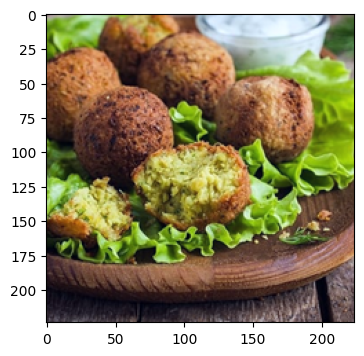

In [21]:
# Process Image
# Load and preprocess the image
# image = process_image("../examples/food/pizza.jpeg)
image = process_image("../examples/food/falafel.jpeg")

# Pass the preprocessed image to the model for prediction
top_prob, top_class = predict(image, model)

# Show the original image
show_image(image)

# Determine the predicted class label
# If the predicted class is within the range of 0-101, use the class label from the list of food classes
# Otherwise, assign "non_food" as the predicted class label
if top_class in range(0, 102):
    c = classes[top_class]
else:
    c = "non_food"

# Print the prediction results
print("The model is ", top_prob, "% certain that the image is", c)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  12.41617488861084 % certain that the image is non_food


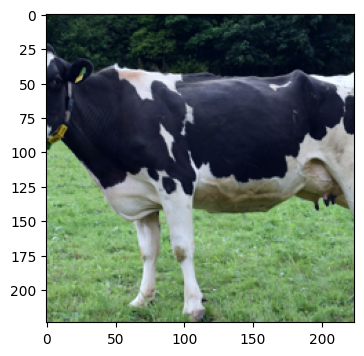

In [17]:
# Process Image
# Load and preprocess the image
# image = process_image("../examples/non_food/table.jpg")
image = process_image("../examples/non_food/cow.jpeg")

# Pass the preprocessed image to the model for prediction
top_prob, top_class = predict(image, model)

# Show the original image
show_image(image)

# Determine the predicted class label
# If the predicted class is within the range of 0-101 and the prediction probability is greater than 50%,
# use the class label from the list of food classes
# Otherwise, assign "non_food" as the predicted class label
if top_class in range(0, 102) and top_prob > 50:
    c = classes[top_class]
else:
    c = "non_food"

# Print the prediction results
print("The model is ", top_prob, "% certain that the image is", c)